<a href="https://colab.research.google.com/github/theyug/Data_Science/blob/main/Yug_DS_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tweet-preprocessor


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import re
import preprocessor as p
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.metrics import accuracy_score


In [3]:
df = pd.read_csv(r"/content/COVIDSenti-A.csv")


In [4]:
df

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu
...,...,...
29995,CDC: Re-test confirms Westerdam cruise ship pa...,neu
29996,Two doctors die of coronavirus within 24 hours...,neu
29997,BEIJING - The lockdown of Guo Jing's neighbour...,neu
29998,#CoronavirusOutbreak in #Balochistan !!\n#CPEC...,neu


In [5]:
df.describe()



,tweet,label
count,30000,30000
unique,29987,3
top,Copper price and coronavirus: ‚ÄúBlack swan li...,neu
freq,3,22949


The dataset contains a 'tweet' Column and 'label' column. The label column is a categorical column with values neutral- 'neu', positive-'pos' and negative-'neg'.

In [6]:
df['label'].value_counts()


label
neu    22949
neg     5083
pos     1968
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='label'>

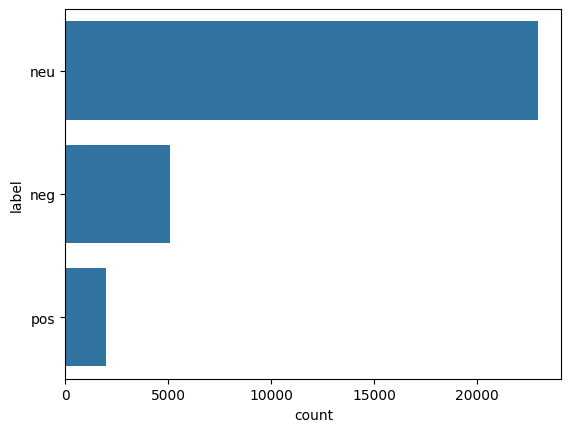

In [7]:
sn.countplot(df['label'])


In [8]:
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

In [9]:
# costum function to clean the dataset (combining tweet_preprocessor and reguar expression)
def clean_tweets(df):
    arr = []
    for line in df:
        # send to tweet_processor
        tmpL = p.clean(line)
        # remove puctuation
        tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
        tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
        arr.append(tmpL)
    return arr

In [10]:
!pip install scikit-learn

In [11]:
#calling the clean functions to clean the tweet column
cleaned_tweet = clean_tweets(df["tweet"])
cleaned_tweet = pd.DataFrame(cleaned_tweet)

In [12]:
cleaned_tweet

,0
0,coronavirus human coronavirus types cdc
1,thats true corona virus swine flue bird flu i...
2,tldr not sars possibly new coronavirus difficu...
3,disease outbreak news from the who middle east...
4,china media wsj says sources tell them myste...
...,...
29995,cdc re test confirms westerdam cruise ship pas...
29996,two doctors die of coronavirus within hours in...
29997,beijing the lockdown of guo jings neighbourh...
29998,in a route to spread from to


In [13]:
# append cleaned tweets to the training data
df["cleaned_tweet"] = cleaned_tweet

# compare the cleaned and uncleaned tweets
df.head(10)

,tweet,label,cleaned_tweet
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu,coronavirus human coronavirus types cdc
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu,thats true corona virus swine flue bird flu i...
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg,tldr not sars possibly new coronavirus difficu...
3,Disease outbreak news from the WHO: Middle Eas...,neu,disease outbreak news from the who middle east...
4,China - Media: WSJ says sources tell them myst...,neu,china media wsj says sources tell them myste...
5,The mystery new virus causing #China pneumonia...,neu,the mystery new virus causing pneumonia outbre...
6,Virologists weigh in on novel coronavirus in C...,neu,virologists weigh in on novel coronavirus in c...
7,"""Chinese authorities have made a preliminary d...",neu,chinese authorities have made a preliminary de...
8,@tezuma75 Why #CCP keep on saying unknown caus...,neg,why keep on saying unknown cause of pneumonia ...
9,Chinese report says mysterious illnesses may b...,neu,chinese report says mysterious illnesses may b...


In [14]:
#Performing the test-train split and the ratio taken is 70:30
y=df.label.values
x=df.cleaned_tweet.values
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=7,test_size=0.3,shuffle=True)


In [15]:
# vectorize tweets for model building
vectorizer = CountVectorizer(binary=True, stop_words='english')

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(x_train) + list(x_test))

# transform documents to document-term matrix
x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)




In [16]:
# classify using support vector classifier
from sklearn import svm
svm = svm.SVC(kernel = 'linear', probability=True)

# fit the SVC model based on the given training data
prob = svm.fit(x_train_vec, y_train).predict_proba(x_test_vec)

# perform classification and prediction on samples in x_test
y_pred_svm = svm.predict(x_test_vec)

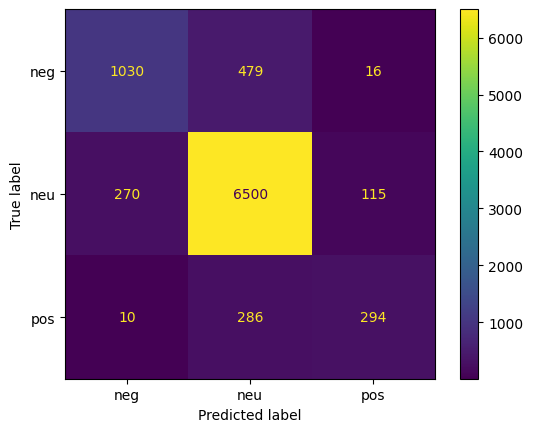

In [17]:
#confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)


In [18]:
#Printing the classification report to see all the values of the metrics
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_svm))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         neg       0.79      0.68      0.73      1525
         neu       0.89      0.94      0.92      6885
         pos       0.69      0.50      0.58       590

    accuracy                           0.87      9000
   macro avg       0.79      0.71      0.74      9000
weighted avg       0.86      0.87      0.86      9000



In [19]:
#Printing the classification report to see all the values of the metrics
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_svm))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         neg       0.79      0.68      0.73      1525
         neu       0.89      0.94      0.92      6885
         pos       0.69      0.50      0.58       590

    accuracy                           0.87      9000
   macro avg       0.79      0.71      0.74      9000
weighted avg       0.86      0.87      0.86      9000



WE TRAINED THE DATASET THROUGH SVM MODEL

In [20]:
df.isnull().head()

,tweet,label,cleaned_tweet
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


<Axes: >

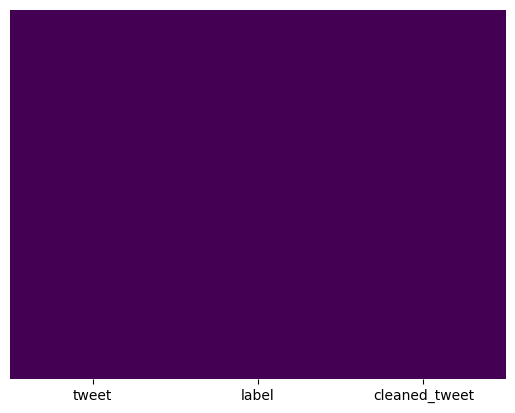

In [21]:
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
sn.set_style('whitegrid')

<Axes: xlabel='label', ylabel='count'>

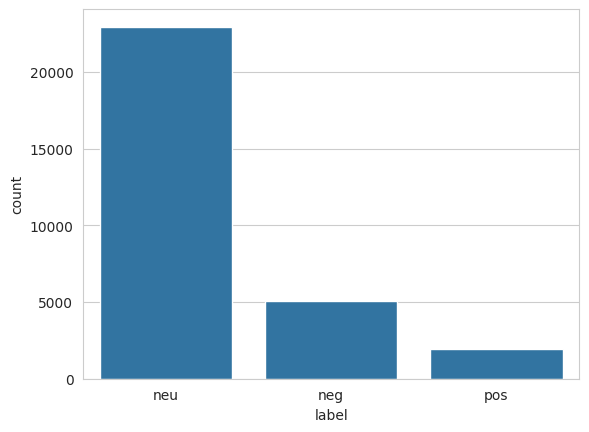

In [23]:
sn.countplot(x='label',data=df)

ValueError: could not convert string to float: 'neu'

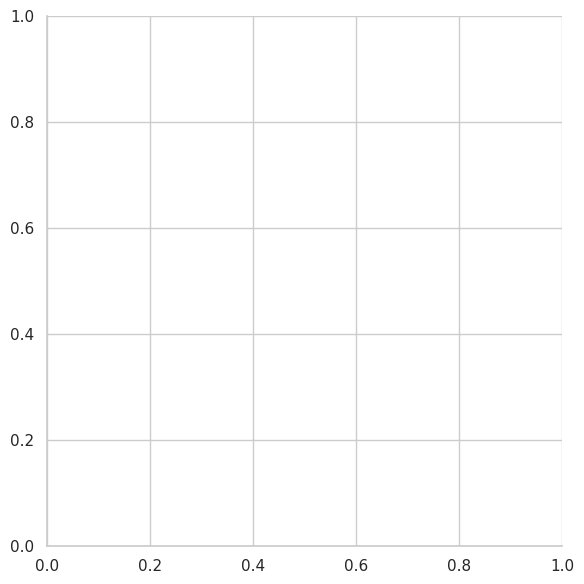

In [24]:
data = {
    'x_column': [1, 2, 3, 4, 5],
    'y_column': [2, 3, 4, 5, 6]
}
df = pd.read_csv('/content/COVIDSenti-A.csv')

# Set seaborn style
sn.set(style="whitegrid")
sn.lmplot(x='label', y='tweet', data=df, ci=None, scatter_kws={"s": 80}, palette="muted", height=6)

# Customize labels and title
plt.xlabel('X Axis Label', fontsize=14)
plt.ylabel('Y Axis Label', fontsize=14)
plt.title('Regression Analysis', fontsize=16)

# Show plot
plt.show()


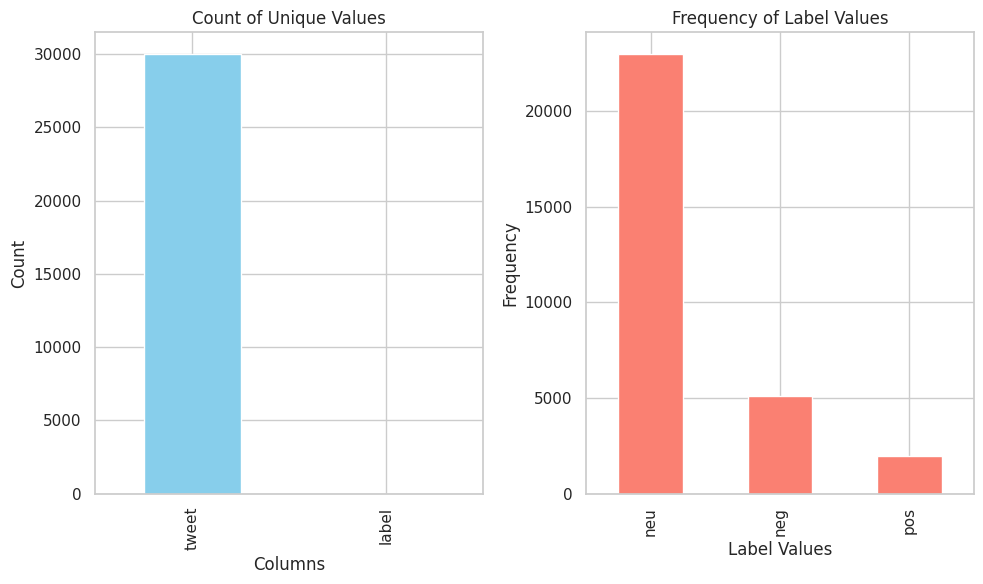

In [25]:
unique_counts = df.nunique()

# Find the frequency of each value in the 'label' column
label_freq = df['label'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))

# Plot count of unique values in each column
plt.subplot(1, 2, 1)
unique_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Unique Values')
plt.xlabel('Columns')
plt.ylabel('Count')

# Plot frequency of each value in the 'label' column
plt.subplot(1, 2, 2)
label_freq.plot(kind='bar', color='salmon')
plt.title('Frequency of Label Values')
plt.xlabel('Label Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

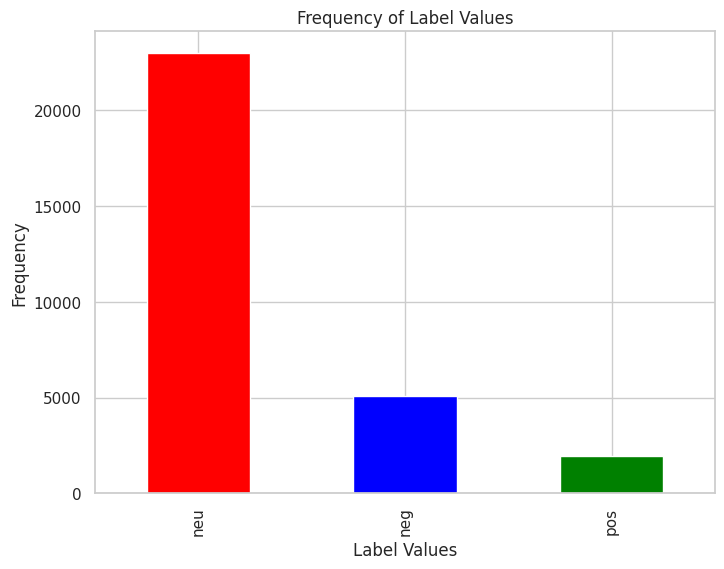

In [26]:
label_freq = df['label'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))

# Plot frequency of 'neg', 'neu', and 'pos' values
label_freq.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Frequency of Label Values')
plt.xlabel('Label Values')
plt.ylabel('Frequency')

plt.show()

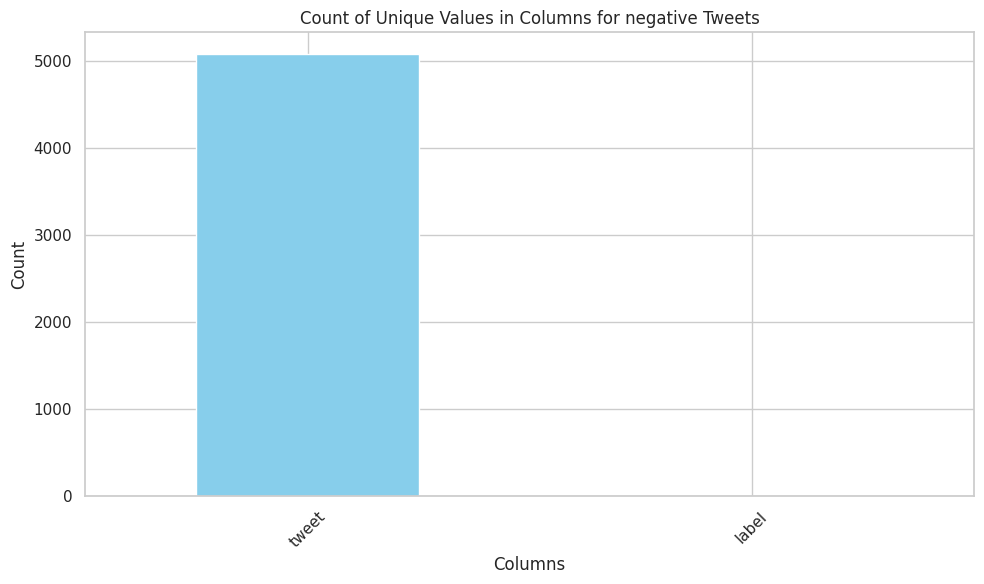

In [27]:
neg_df = df[df['label'] == 'neg']

# Count unique values in each column for the filtered DataFrame
unique_counts_neg = neg_df.nunique()

# Plotting
plt.figure(figsize=(10, 6))

# Plot count of unique values in each column for 'neg' tweets
unique_counts_neg.plot(kind='bar', color='skyblue')
plt.title('Count of Unique Values in Columns for negative Tweets')
plt.xlabel('Columns')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We have performed Logistic regression/regression on the dataset


In [28]:
df.shape

(30000, 2)

In [29]:
df.isnull().sum()

tweet    0
label    0
dtype: int64

In [30]:
df.dtypes    ## Checking the datatype


tweet    object
label    object
dtype: object

In [31]:
# Descision Tree Implementation on Iris Dataset
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df.shape

(150, 6)

In [ ]:
df.size

In [33]:
df.isnull()    ## Checking the null values in bool form

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [34]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [35]:
df.dtypes    ## Checking the datatype


Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [36]:
Species_dummies = pd.get_dummies(df.Species)

In [37]:
Species_dummies

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [38]:

df = pd.concat([df,Species_dummies], axis = 'columns')   ## Concatinating the new dummy row to df

In [39]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,True,False,False
1,2,4.9,3.0,1.4,0.2,Iris-setosa,True,False,False
2,3,4.7,3.2,1.3,0.2,Iris-setosa,True,False,False
3,4,4.6,3.1,1.5,0.2,Iris-setosa,True,False,False
4,5,5.0,3.6,1.4,0.2,Iris-setosa,True,False,False
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,False,False,True
146,147,6.3,2.5,5.0,1.9,Iris-virginica,False,False,True
147,148,6.5,3.0,5.2,2.0,Iris-virginica,False,False,True
148,149,6.2,3.4,5.4,2.3,Iris-virginica,False,False,True


In [40]:
df.drop(['Species'],axis = 'columns',inplace = True)   ## Removing the old species col from dataset

<Axes: >

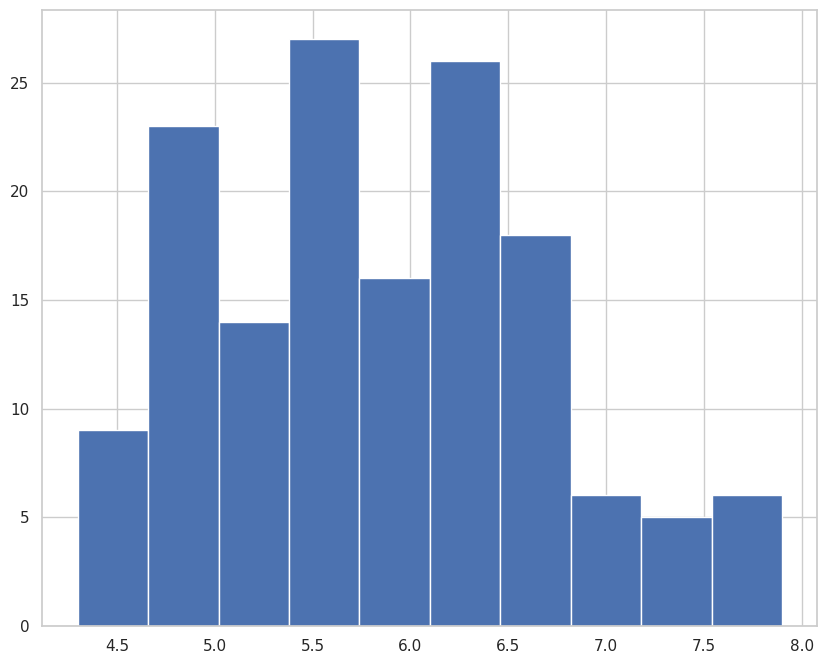

In [41]:
plt.figure(figsize = (10,8))
df['SepalLengthCm'].hist()

<Axes: >

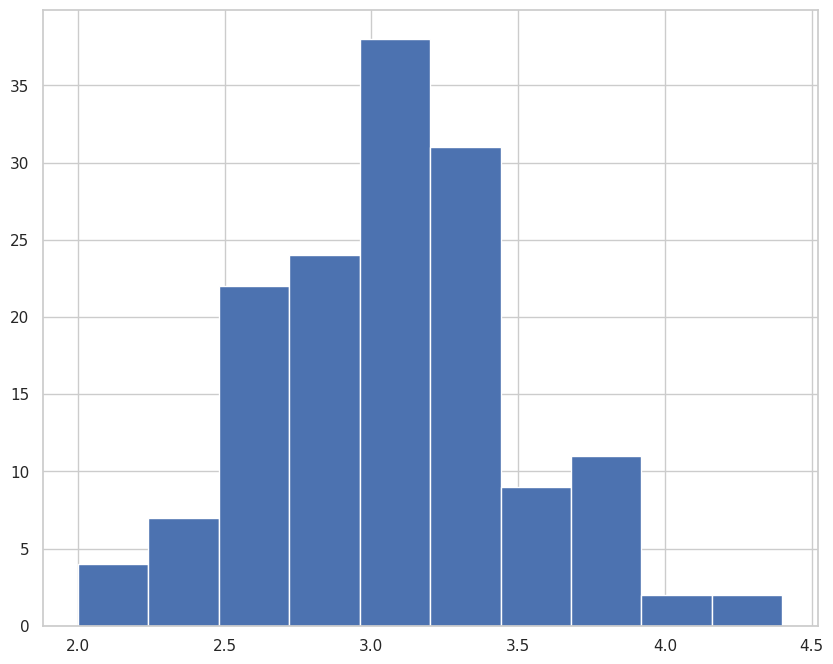

In [42]:
plt.figure(figsize = (10,8))
df['SepalWidthCm'].hist()


<Axes: >

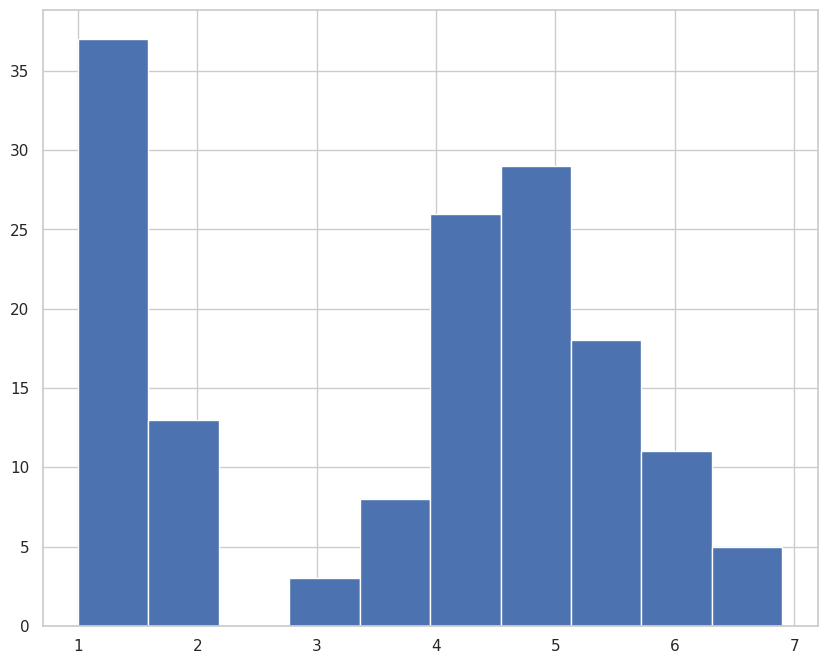

In [43]:
plt.figure(figsize = (10,8))
df['PetalLengthCm'].hist()

<Axes: >

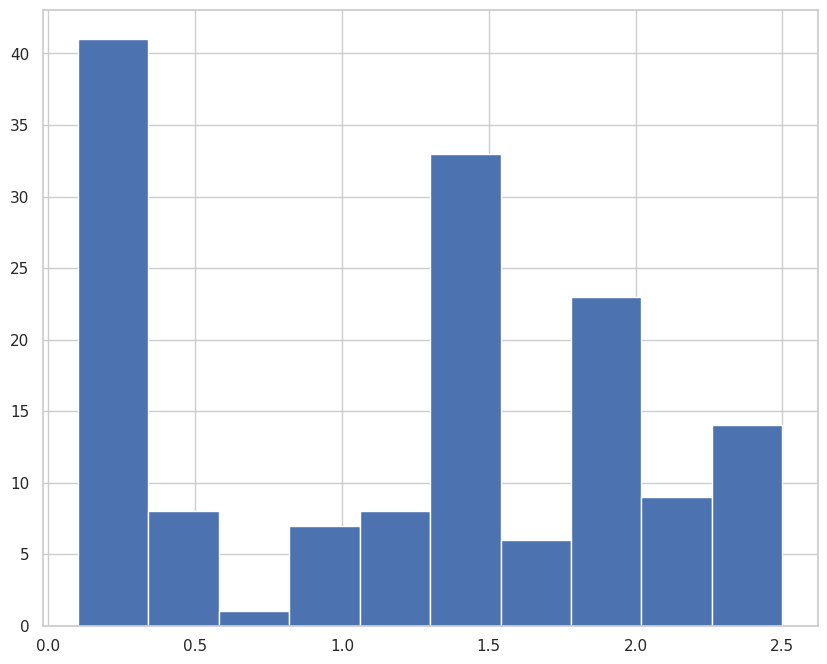

In [44]:
plt.figure(figsize = (10,8))
df['PetalWidthCm'].hist()

In [45]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
Id,1.000000e+00,0.716676,-0.397729,0.882747,0.899759,-0.816515,-3.481012e-18,0.816515
SepalLengthCm,7.166763e-01,1.000000,-0.109369,0.871754,0.817954,-0.717416,7.939552e-02,0.638020
SepalWidthCm,-3.977288e-01,-0.109369,1.000000,-0.420516,-0.356544,0.595601,-4.646996e-01,-0.130901
PetalLengthCm,8.827473e-01,0.871754,-0.420516,1.000000,0.962757,-0.922688,2.015868e-01,0.721102
PetalWidthCm,8.997586e-01,0.817954,-0.356544,0.962757,1.000000,-0.887510,1.183760e-01,0.769134
Iris-setosa,-8.165147e-01,-0.717416,0.595601,-0.922688,-0.887510,1.000000,-5.000000e-01,-0.500000
Iris-versicolor,-3.481012e-18,0.079396,-0.464700,0.201587,0.118376,-0.500000,1.000000e+00,-0.500000
Iris-virginica,8.165147e-01,0.638020,-0.130901,0.721102,0.769134,-0.500000,-5.000000e-01,1.000000


<Axes: >

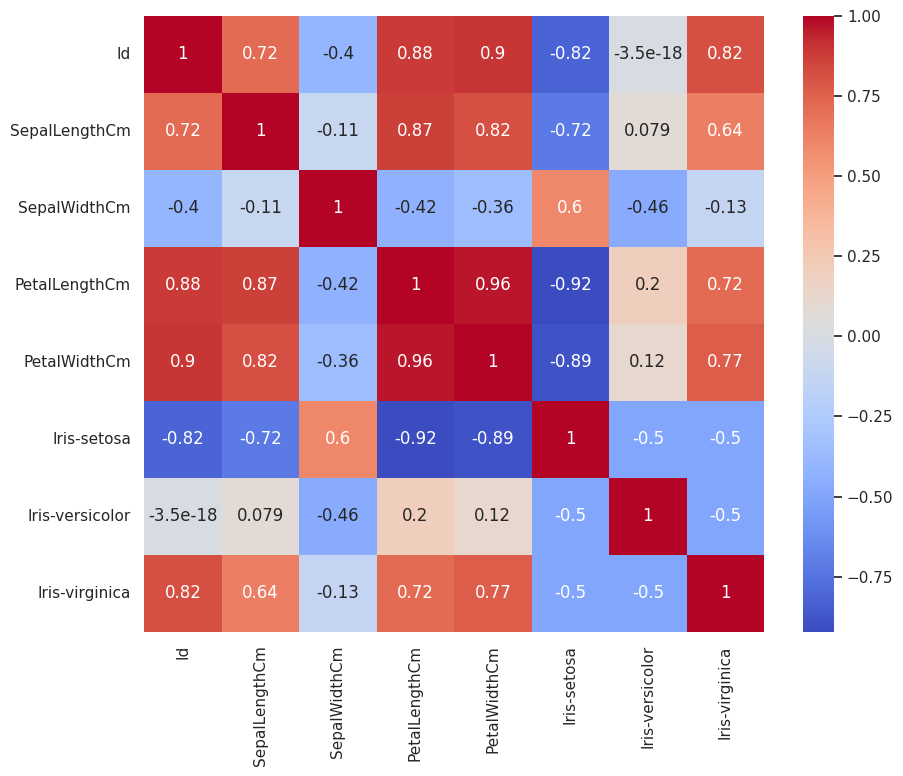

In [46]:
corr = df.corr()
fig,ax = plt.subplots(figsize = (10,8))
sn.heatmap(corr , annot = True , ax = ax , cmap = 'coolwarm')    ## Checking coorelation with help of heatmap

In [47]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,True,False,False
1,2,4.9,3.0,1.4,0.2,True,False,False
2,3,4.7,3.2,1.3,0.2,True,False,False
3,4,4.6,3.1,1.5,0.2,True,False,False
4,5,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,False,False,True
146,147,6.3,2.5,5.0,1.9,False,False,True
147,148,6.5,3.0,5.2,2.0,False,False,True
148,149,6.2,3.4,5.4,2.3,False,False,True


In [48]:
column_to_remove = 'Id'

# Remove the specified column
df = df.drop(columns=[column_to_remove])
print(df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Iris-setosa  \
0              5.1           3.5            1.4           0.2         True   
1              4.9           3.0            1.4           0.2         True   
2              4.7           3.2            1.3           0.2         True   
3              4.6           3.1            1.5           0.2         True   
4              5.0           3.6            1.4           0.2         True   
..             ...           ...            ...           ...          ...   
145            6.7           3.0            5.2           2.3        False   
146            6.3           2.5            5.0           1.9        False   
147            6.5           3.0            5.2           2.0        False   
148            6.2           3.4            5.4           2.3        False   
149            5.9           3.0            5.1           1.8        False   

     Iris-versicolor  Iris-virginica  
0              False    

In [49]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


In [50]:
X = df.iloc[:,0:4].values

In [51]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [52]:
Y = df.iloc[:,4:7].values      ## Extracting our Dependent/Traget/Predictable variable

In [53]:
Y

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

In [54]:
from sklearn.model_selection import train_test_split   ## Importing train test split

In [55]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20,random_state =  0)  ## Assigning the all 4 var for train test split

In [56]:
 ## Importing Descision tree
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)    ## Making an instance and object nd providig thensplitting criterian = entropy
dtmodel.fit(X_train,Y_train)   ## Fitting the instance into the model

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [57]:
y_pred = dtmodel.predict(X_test)    ## Now predicting the model

In [58]:
df = df.astype(int)

# Display the DataFrame
print(df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Iris-setosa  \
0                5             3              1             0            1   
1                4             3              1             0            1   
2                4             3              1             0            1   
3                4             3              1             0            1   
4                5             3              1             0            1   
..             ...           ...            ...           ...          ...   
145              6             3              5             2            0   
146              6             2              5             1            0   
147              6             3              5             2            0   
148              6             3              5             2            0   
149              5             3              5             1            0   

     Iris-versicolor  Iris-virginica  
0                  0    

In [59]:
dtmodel.predict([[4.6,3.1,1.5,0.2]])   ## Predicting the species with newer input


array([[ True, False, False]])

In [60]:
dtmodel.score(X_test,Y_test)

1.0

In [61]:
## Text representation

from sklearn import tree
text_representation = tree.export_text(dtmodel)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 1
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 0
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 0



[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\nentropy = 0.916\nsamples = 120\nvalue = [[81, 39]\n[83, 37]\n[76, 44]]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 39\nvalue = [[0, 39]\n[39, 0]\n[39, 0]]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\nentropy = 0.663\nsamples = 81\nvalue = [[81, 0]\n[44, 37]\n[37, 44]]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\nentropy = 0.313\nsamples = 40\nvalue = [[40, 0]\n[4, 36]\n[36, 4]]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\nentropy = 0.125\nsamples = 35\nvalue = [[35, 0]\n[1, 34]\n[34, 1]]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 34\nvalue = [[34, 0]\n[0, 34]\n[34, 0]]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [[1, 0]\n[1, 0]\n[0, 1]]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\nentropy = 0.647\nsamples = 5\nvalue = [[5, 0]\n[3, 2]\n[2, 3]]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = 

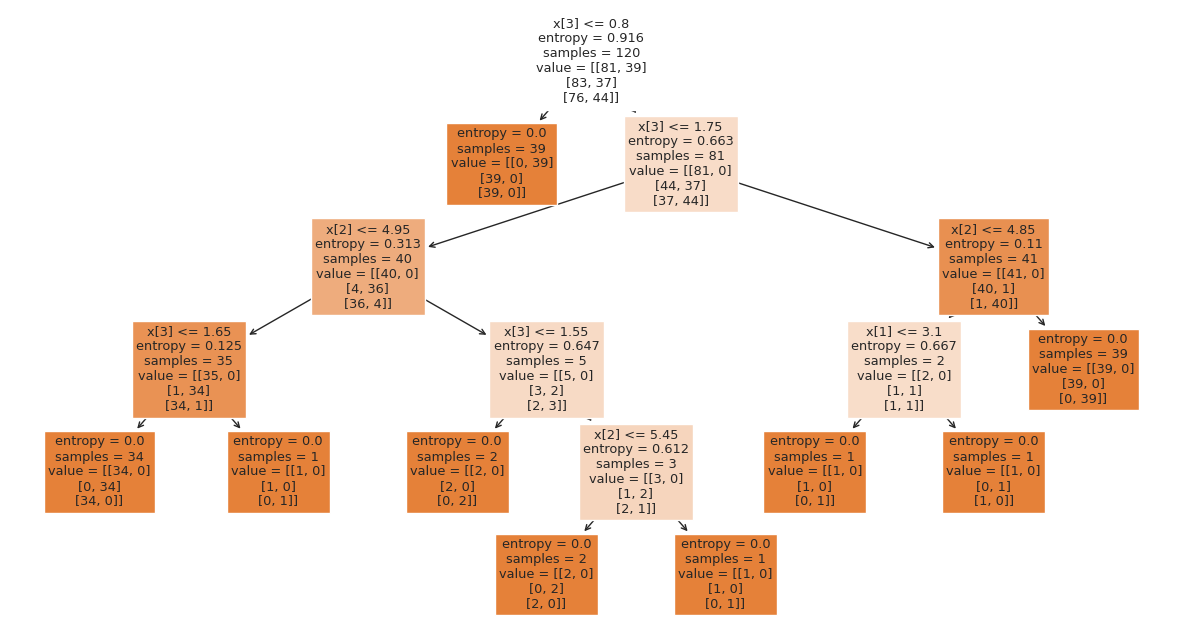

In [62]:
## Plotting Tree plot_tree

fig  = plt.figure(figsize = (15,8))
tree.plot_tree(dtmodel,filled = True)

**WE HAVE PERFORMED DESCISON TREE IMPLEMENTATION  ON IRIS DATASET**

In [70]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

iris=load_iris()
df=pd.DataFrame(iris.data , columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [71]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
#RANDOMFOREST CLASSIFIER ON SIMPLE DATASETS.
df['is_train']=np.random.uniform(0,1,len(df)) <=.75
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,is_train
0,1,5.1,3.5,1.4,0.2,Iris-setosa,True
1,2,4.9,3.0,1.4,0.2,Iris-setosa,True
2,3,4.7,3.2,1.3,0.2,Iris-setosa,True
3,4,4.6,3.1,1.5,0.2,Iris-setosa,False
4,5,5.0,3.6,1.4,0.2,Iris-setosa,True


In [73]:
train,test =df[df['is_train']==True],df[df['is_train']==False]
print('Number of observation in the training data:', len(train))
print('Number of observation in the testing data:', len(test))

Number of observation in the training data: 107
Number of observation in the testing data: 43


In [65]:
features = df.columns[:4]
features

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [74]:

y=pd.factorize(train['Species'])[0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [75]:
clf=RandomForestClassifier(n_jobs=2,random_state=0)
clf.fit(train[features],y)

RandomForestClassifier(n_jobs=2, random_state=0)

In [76]:
 clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [77]:
clf.predict_proba(test[features])

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.91, 0.09, 0.  ],
       [0.92, 0.08, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.92, 0.08, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.92, 0.08, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.01, 0.98, 0.01],
       [0.08, 0.61, 0.31],
       [0.03, 0.78, 0.19],
       [0.08, 0.59, 0.33],
       [0.  , 0.89, 0.11],
       [0.  , 0.82, 0.18],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.25, 0.75],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.08, 0.61, 0.31],
       [0.  , 1.  , 0.  ],
       [0.11, 0.59, 0.3 ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.02, 0.98],
       [0.  , 0.  , 1.  ],
       [0.  , 0.01, 0.99],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.16, 0.84],
 

In [78]:
preds=iris.target_names[clf.predict(test[features])]

In [79]:
preds[0:10]


array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [80]:
test['Species'].head()

3     Iris-setosa
13    Iris-setosa
14    Iris-setosa
15    Iris-setosa
16    Iris-setosa
Name: Species, dtype: object

In [81]:

pd.crosstab(test['Species'],preds,rownames=['Actual Species'],colnames=['Predicted Species'])


Predicted Species,setosa,versicolor,virginica
Actual Species,,,
Iris-setosa,14,0,0
Iris-versicolor,0,13,1
Iris-virginica,0,0,15


In [82]:
preds=iris.target_names[clf.predict([[5.0 , 3.6 , 1.4 , 2.0]])]
preds

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype='<U10')

**WE HAVE PERFORMED RANDOM FOREST CLASSIFCATION ON IRIS DATASET**

> Add blockquote



In [83]:
# K-Means-Clustering-on-Iris-dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
import sklearn.metrics as sm

In [84]:
df = pd.read_csv('Iris.csv')

In [85]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [86]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


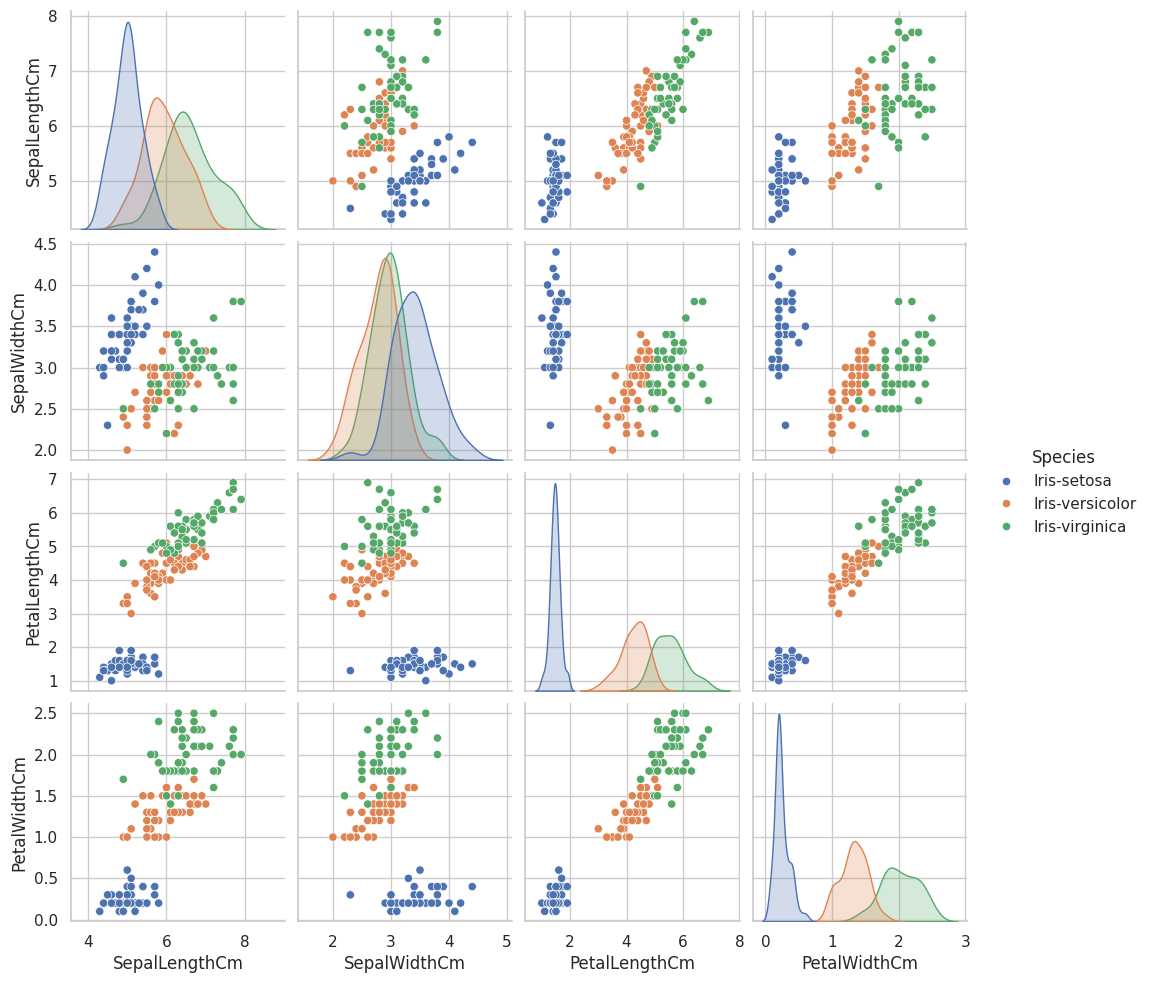

In [87]:
sns.pairplot(df.iloc[:, 1:], hue="Species")

In [88]:
data = df.iloc[:,1:5]


In [89]:
#optimal number
# SSE is the sum of squared distance within the clusters(WCSS)

SSE = []

In [90]:
from sklearn.cluster import KMeans

SSE = []
for cluster in range(1, 20):
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(data)
    SSE.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [91]:
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})


In [92]:
frame.head(10)


,Cluster,SSE
0,1,680.824400
1,2,152.368706
2,3,78.940841
3,4,57.317873
4,5,46.535582
5,6,38.953730
6,7,34.464007
7,8,29.887696
8,9,28.244641
9,10,26.456487


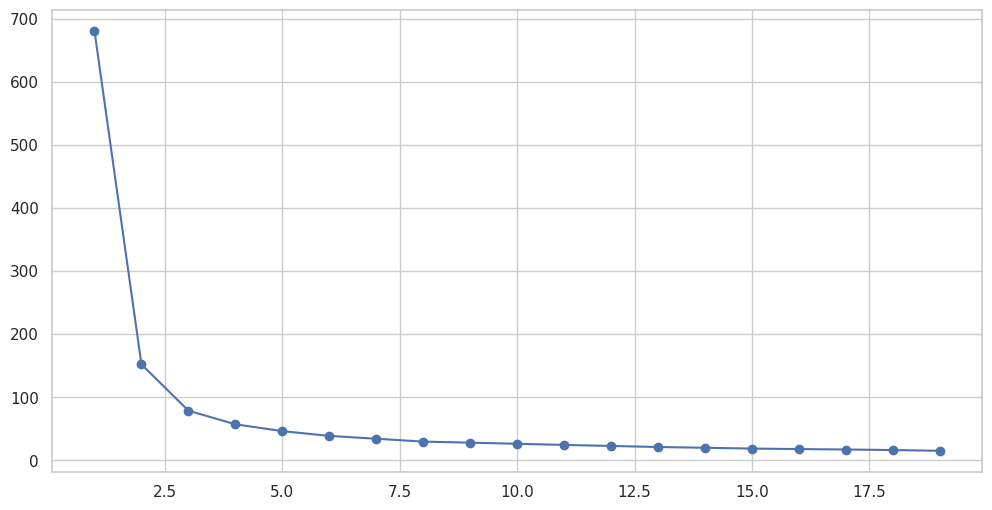

In [93]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')

SCALING THE DATA

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)


In [95]:
pd.DataFrame(data_scaled).describe()


,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [96]:
from sklearn.cluster import KMeans

# Instantiate KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to your data
kmeans.fit(data)

# Predict the cluster labels for your data
pred = kmeans.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [97]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [98]:
pd.Series(pred).value_counts()


0    62
1    50
2    38
Name: count, dtype: int64

In [99]:
df['Prediction'] = pred

In [100]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Prediction
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [101]:
df[df['Prediction']==0].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Prediction
50,51,7.0,3.2,4.7,1.4,Iris-versicolor,0
51,52,6.4,3.2,4.5,1.5,Iris-versicolor,0
53,54,5.5,2.3,4.0,1.3,Iris-versicolor,0
54,55,6.5,2.8,4.6,1.5,Iris-versicolor,0
55,56,5.7,2.8,4.5,1.3,Iris-versicolor,0


In [102]:
df[df['Prediction']==1].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Prediction
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [103]:
df[df['Prediction']==2].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Prediction
52,53,6.9,3.1,4.9,1.5,Iris-versicolor,2
77,78,6.7,3.0,5.0,1.7,Iris-versicolor,2
100,101,6.3,3.3,6.0,2.5,Iris-virginica,2
102,103,7.1,3.0,5.9,2.1,Iris-virginica,2
103,104,6.3,2.9,5.6,1.8,Iris-virginica,2


In [104]:
df[df['Prediction'] == 0]['Species'].value_counts()

Species
Iris-versicolor    48
Iris-virginica     14
Name: count, dtype: int64

In [105]:
df[df['Prediction'] == 2]['Species'].value_counts()


Species
Iris-virginica     36
Iris-versicolor     2
Name: count, dtype: int64

Text(0, 0.5, 'Sepal Width')

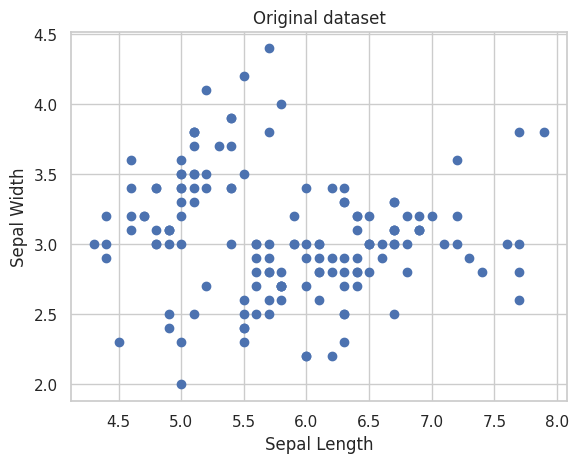

In [106]:
plt.scatter(df.iloc[:,1], df.iloc[:,2])
plt.title("Original dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

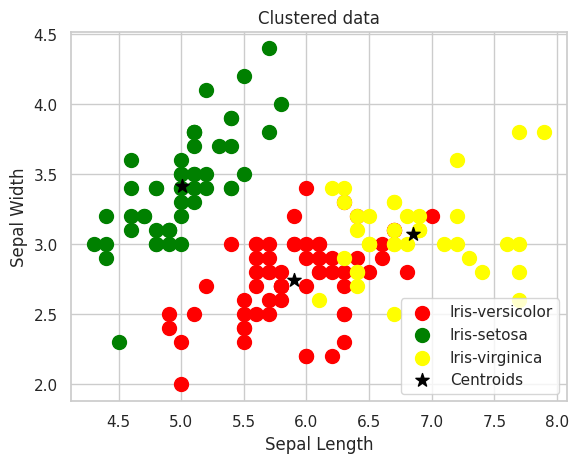

In [107]:
plt.scatter(df[df['Prediction'] == 0].iloc[:,1], df[df['Prediction'] == 0].iloc[:,2],
           s=100, c = 'red', label = 'Iris-versicolor')
plt.scatter(df[df['Prediction'] == 1].iloc[:,1], df[df['Prediction'] == 1].iloc[:,2],
           s=100, c = 'green', label = 'Iris-setosa')
plt.scatter(df[df['Prediction'] == 2].iloc[:,1], df[df['Prediction'] == 2].iloc[:,2],
           s=100, c = 'yellow', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'black', marker = '*', label = 'Centroids')
plt.title("Clustered data")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

In [108]:
df['Predicted species'] = ''
df.loc[df['Prediction'] == 0, 'Predicted species'] = 'Iris-versicolor'
df.loc[df['Prediction'] == 1, 'Predicted species'] = 'Iris-setosa'
df.loc[df['Prediction'] == 2, 'Predicted species'] = 'Iris-virginica'

In [109]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Prediction,Predicted species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,Iris-setosa
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0,Iris-versicolor
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2,Iris-virginica


In [110]:
sm.accuracy_score(df['Species'], df['Predicted species'])


0.8933333333333333

In [111]:
sm.confusion_matrix(df['Species'], df['Predicted species'])


array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

Therefore our model is 89% accurate

WE HAVE COMPLETED K-MEANS CLUSTERING ON IRIS DATASET